In [128]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords

In [2]:
nltk.__version__

'3.2.5'

In [7]:
messages = [ line.rstrip() for line in open('SMSSpamCollection')]

In [17]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [19]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [23]:
data = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [24]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [29]:
data['length'] = data['message'].apply(len)

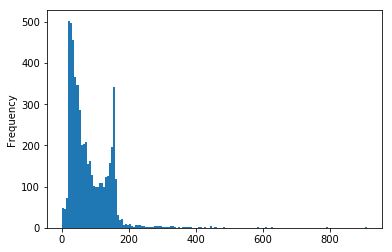

In [35]:
data['length'].plot.hist(bins=150)

In [38]:
data.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B37D9D99B0>,
      dtype=object)

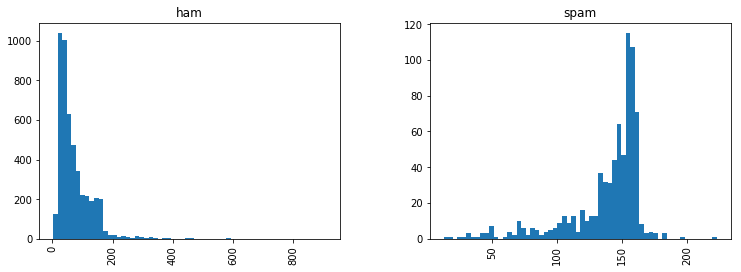

In [39]:
data.hist(column='length', by='label', bins=60, figsize=(12,4))

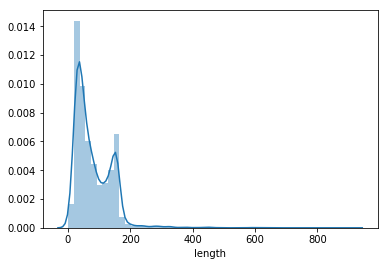

In [41]:
sns.distplot(data['length'])

In [62]:
mess = 'Reduce siginicaly not necessary influce : in between any entities'

In [63]:
mess2 = [ c for c in mess if c not in string.punctuation]

In [64]:
len(stopwords.words('english'))

179

In [65]:
mess2 = ''.join(mess2)

In [66]:
mess2 = [ w for w in mess2.split() if w.lower() not in stopwords.words('english') ]

In [67]:
mess2

['Reduce', 'siginicaly', 'necessary', 'influce', 'entities']

In [68]:
def text_process(text):
    
    result = [ c for c in text if c not in string.punctuation ]
    
    result = ''.join(result)
    
    result = [ word for word in result.split() if word.lower() not in stopwords.words('english')]
    
    return result

In [69]:
text_process(mess)

['Reduce', 'siginicaly', 'necessary', 'influce', 'entities']

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [72]:
bow =  CountVectorizer(analyzer=text_process).fit(data['message'])

In [75]:
len(bow.vocabulary_)

11425

In [76]:
mess4 = data['message'][3]

In [77]:
mess4

'U dun say so early hor... U c already then say...'

In [83]:
bow4 = bow.transform([mess4])

In [85]:
bow4.shape

(1, 11425)

In [90]:
bow.get_feature_names()[9554]

'say'

In [91]:
bow_data = bow.transform(data['message'])

In [95]:
bow_data.shape

(5572, 11425)

In [94]:
tfidf_transformer = TfidfTransformer().fit(bow_data)

In [97]:
tfidf_data = tfidf_transformer.transform(bow_data)

In [100]:
tfidf_transformer.idf_[bow.vocabulary_['text']]

4.781501701110945

In [106]:
spam_detect_model = MultinomialNB().fit(tfidf_data, data['label'])

In [109]:
type(spam_detect_model.predict(tfidf_data[4])[0])

numpy.str_

In [110]:
predictions = spam_detect_model.predict(tfidf_data)

In [123]:
prob = spam_detect_model.predict_proba(tfidf_data)

In [112]:
type(predictions)

numpy.ndarray

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], 
                                                    data['label'], 
                                                    test_size=0.3, random_state=77)

In [116]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [117]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001B37F2CD158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [136]:
predictions.shape

(5572,)

In [132]:
print(confusion_matrix(data['label'], predictions))

[[4825    0]
 [ 115  632]]


In [121]:
print(classification_report(data['label'], predictions)))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [139]:
prob.max(axis=1)

array([0.98960166, 0.99320497, 0.96767987, ..., 0.88685667, 0.99498194,
       0.94236771])

In [152]:
data['label'].apply(lambda s: 0 if s =='spam' else 1)

0       1
1       1
2       0
3       1
4       1
5       0
6       1
7       1
8       0
9       0
10      1
11      0
12      0
13      1
14      1
15      0
16      1
17      1
18      1
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
5542    1
5543    1
5544    1
5545    1
5546    1
5547    0
5548    1
5549    1
5550    1
5551    1
5552    1
5553    1
5554    1
5555    1
5556    1
5557    1
5558    1
5559    1
5560    1
5561    1
5562    1
5563    1
5564    1
5565    1
5566    0
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(data['label'].apply(lambda s: 0 if s =='spam' else 1).as_matrix(), prob.max(axis=1), pos_label=1)

In [156]:
metrics.auc(fpr, tpr)

0.8427947368055989